In [4]:
import torch
import matplotlib.pyplot as plt

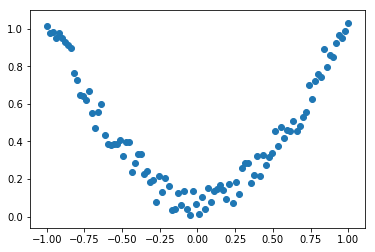

In [17]:
# generate data
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2)+0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(),y.data.numpy())

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [25]:
class Net(nn.Module):
    def __init__(self,n_feture,n_hidden, n_output):
        super(Net,self).__init__()
        
        self.hidden = nn.Linear(n_feture,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [26]:
net = Net(n_feture=1,n_hidden=10,n_output=1)

print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


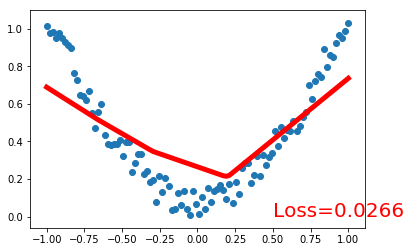

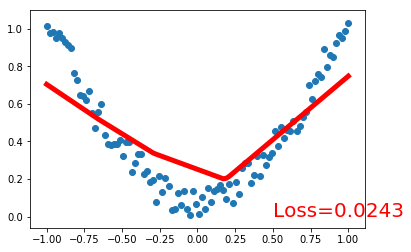

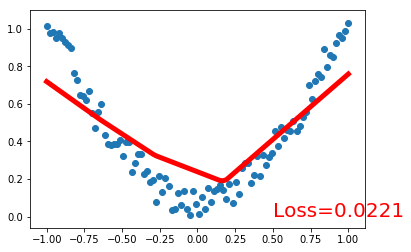

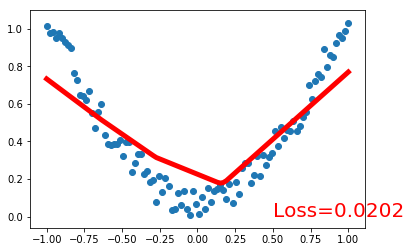

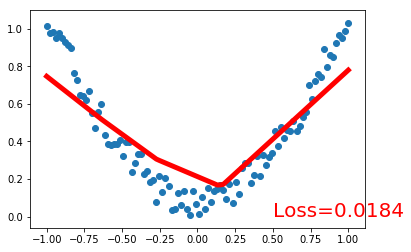

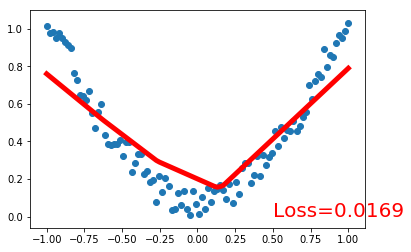

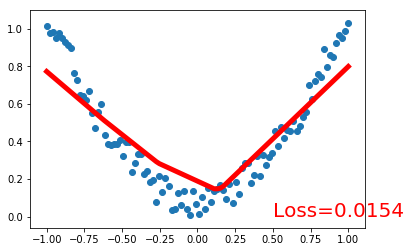

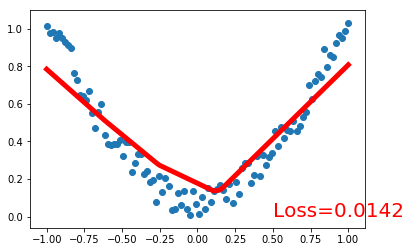

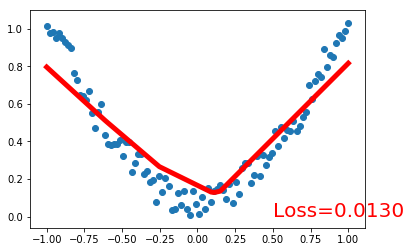

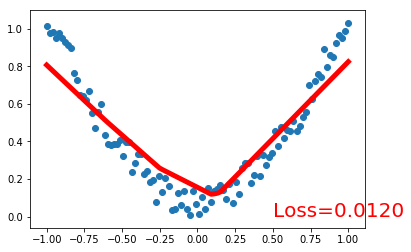

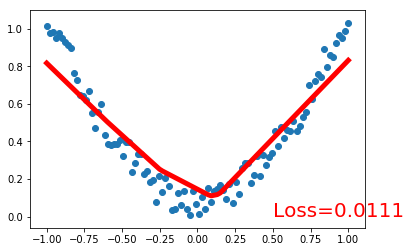

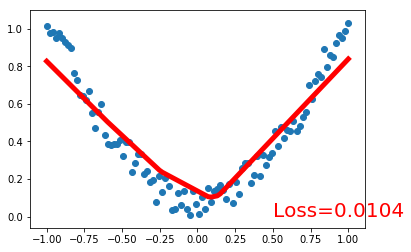

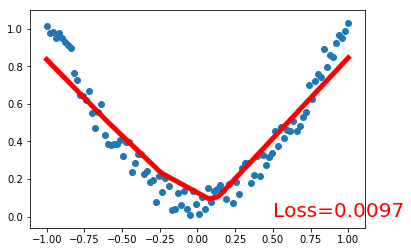

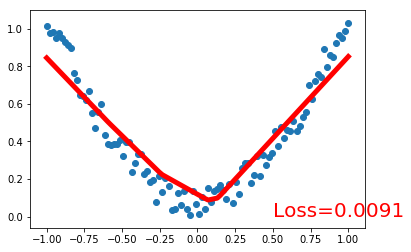

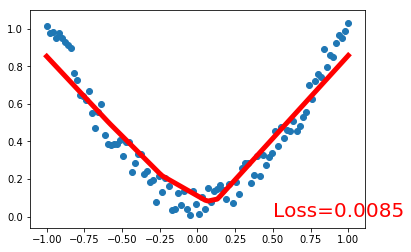

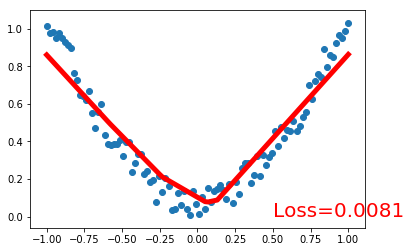

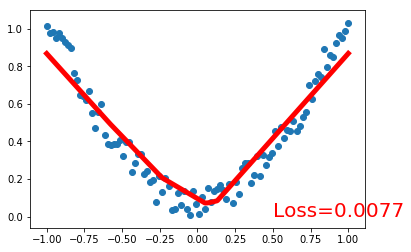

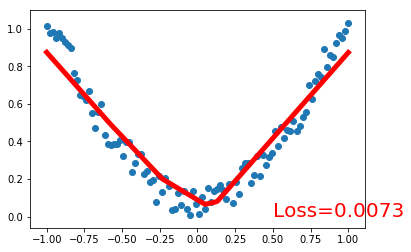

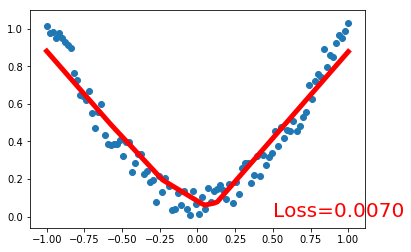

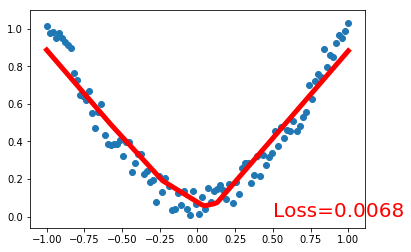

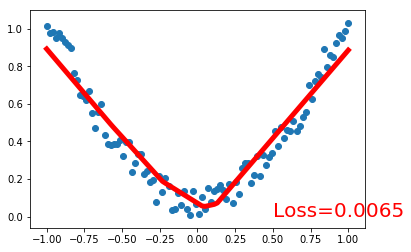

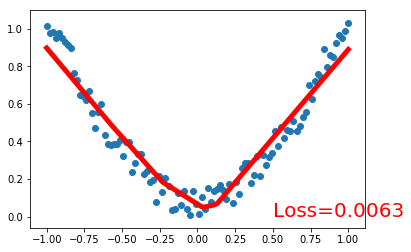

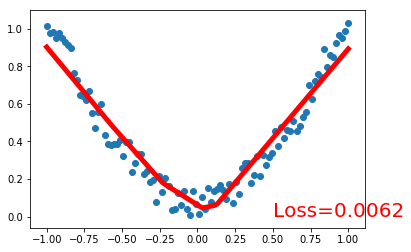

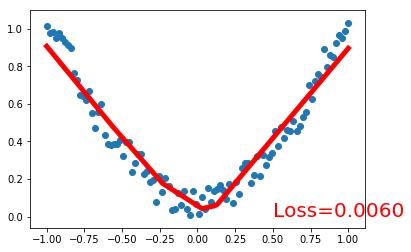

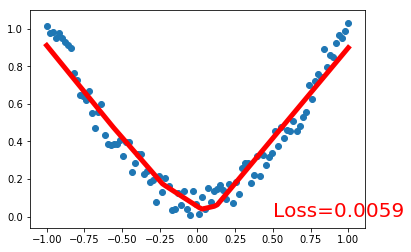

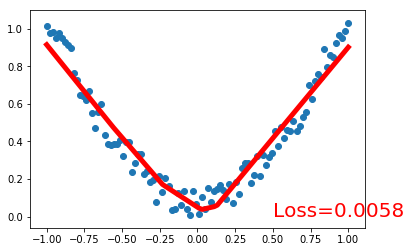

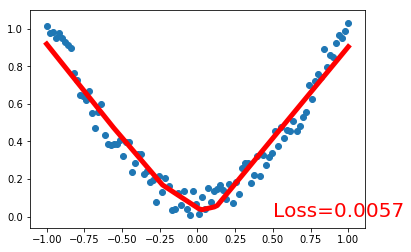

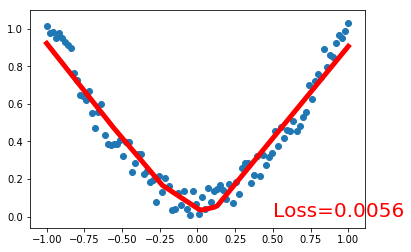

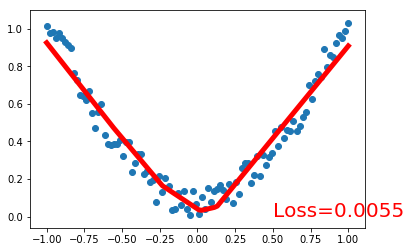

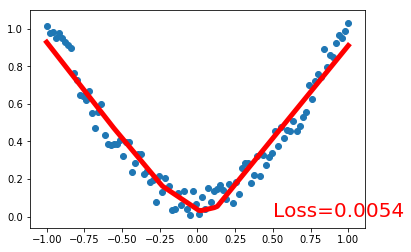

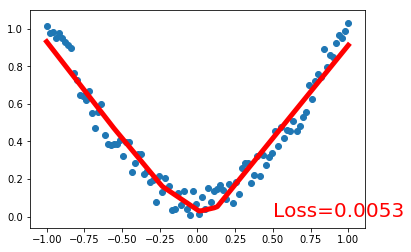

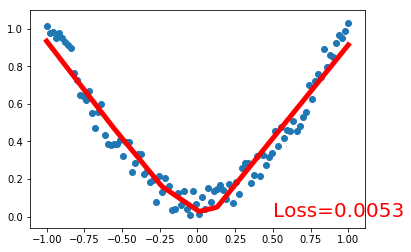

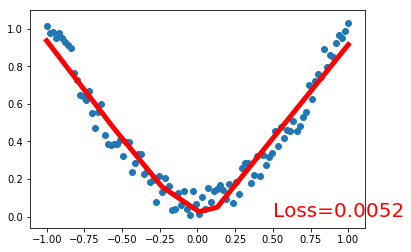

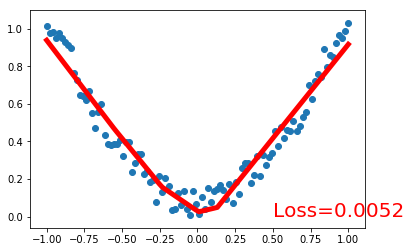

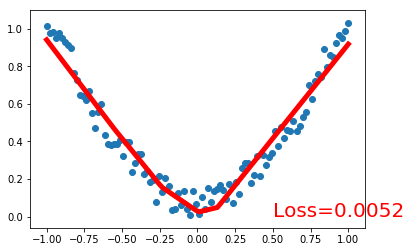

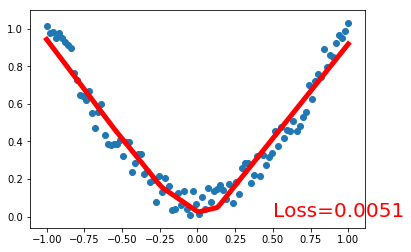

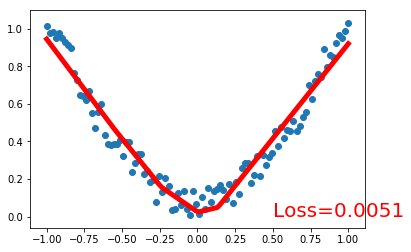

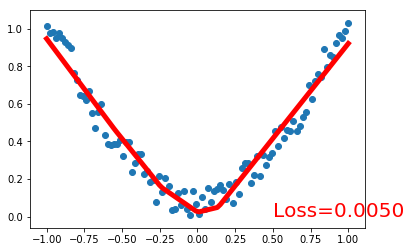

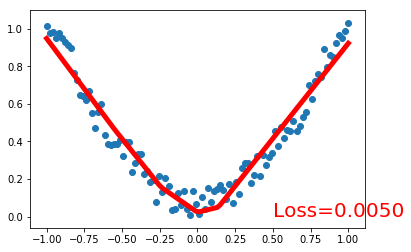

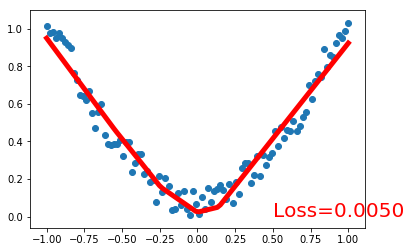

In [28]:
import matplotlib.pyplot as plt
 
plt.ion()   
plt.show()

optimizer = torch.optim.SGD(net.parameters(),lr=1e-1)
mse = nn.MSELoss()

for t in range(300):
    # Forward
    prediction = net(x)
    
    #Loss
    loss = mse(prediction,y)
    
    #optim
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
